Vamos aproveitar esse espaço para fixar os conteúdos aprendidos durante as aulas. Para isso, serão propostos desafios que irão sugerir encontrar e exibir informações referentes ao banco de dados.

Esse desafio vai ser constituído de dois casos para exibir informação, e neles não será necessário construir um gráfico, mas caso queira, fique a vontade para criar uma visualização ou estilizar as tabelas do desafio.

Vamos aos desafios dessa aula, o primeiro é exibir os 10 produtos mais vendidos durante o ano de 2019, que podem ser representados em uma tabela. Já o segundo será publicar a distribuição através dos meses da receita obtida em vendas no ano de 2021. Busque mostrar essa distribuição colocando o mês e sua receita correspondente na visualização.

Vale relembrar que é interessante continuar com as mesmas tabelas já inseridas no banco ('itens_pedidos', 'pedidos', 'produtos', 'vendedores') e também utilizar a mesma função de execução de consulta (sql_df) para resolver os desafios.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [2]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [3]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produto = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [4]:
engine = create_engine('sqlite:///:memory:')

In [5]:
pedidos.to_sql('pedidos', engine, index=False)
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)
produto.to_sql('produtos', engine, index=False)

205

In [6]:
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        resultado = consulta.fetchall()
    return pd.DataFrame(resultado, columns=consulta.keys())

Exibir os 10 produtos mais vendidos durante o ano de 2019

In [30]:
queryExe = 'SELECT * FROM PRODUTOS'
query = '''SELECT PRODUTOS.PRODUTO, COUNT(PEDIDOS.PEDIDO_ID) AS QNT_PEDIDOS
FROM PRODUTOS, PEDIDOS
WHERE strftime('%Y', data_compra) = '2019' AND PRODUTOS.PRODUTO_ID = PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY COUNT(PEDIDOS.PEDIDO_ID) DESC'''
sql_df(query).head(10)

,produto,QNT_PEDIDOS
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


Já o segundo será publicar a distribuição através dos meses da receita obtida em vendas no ano de 2021

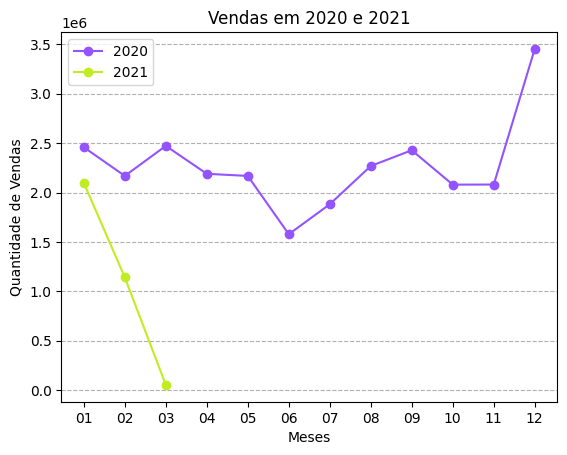

,mes,valores
0,01,2097109
1,02,1140729
2,03,51525


In [54]:
queryExe = 'SELECT * FROM PEDIDOS'
query = '''SELECT strftime('%m', data_compra) AS 'mes', SUM(PEDIDOS.TOTAL) AS valores
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY strftime('%m', data_compra)
'''

query21 = '''SELECT strftime('%m', data_compra) AS 'mes', SUM(PEDIDOS.TOTAL) AS valores
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY strftime('%m', data_compra)
'''
result = sql_df(query)
result21 = sql_df(query21)

import matplotlib.pyplot as plt

# Plotar o gráfico de 2019 e 2020
plt.plot(result.mes.to_numpy(), result.valores.to_numpy(), marker='o', linestyle='-', color='#9353FF', label = '2020')
plt.plot(result21.mes.to_numpy(), result21.valores.to_numpy(), marker='o', linestyle='-', color='#C0ED22', label = '2021')

# Definir título e eixos
plt.title('Vendas em 2020 e 2021')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Vendas')

# Adicionar a legenda
plt.legend()

# Adicionar grid horizontal
plt.grid(axis='y', linestyle='--')

# Exibir a figura
plt.show()
result21
